# Welcome "Exploratory Data Analysis" on MET.



# Task 2: Importing libraries and Exploring the Dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [13]:
# Read the Dataset
#ita_df = pd.read_csv("D:\\PycharmProjects\\myinfoviz\\data_management\\metscraper\\italianData.csv")
#final_df = pd.read_csv("D:\\PycharmProjects\\myinfoviz\\data_management\\viz-works\\final.csv")
ita_df = pd.read_csv('italianData.csv')
final_df = pd.read_csv('final.csv')

In [14]:
#Display the first five dataset

ita_df.head(1)

,Unnamed: 0,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,0,1985.5,0,0,1,435573,NaN,European Paintings,1985.0,Painting,...,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19912099,NaN,"Metropolitan Museum of Art, New York, NY",Goddess|Putti|Flowers|Landscapes,http://vocab.getty.edu/page/aat/300343852|http...,https://www.wikidata.org/wiki/Q205985|https://...


In [15]:
final_df.head(1)

,Unnamed: 0,artwork,history,receivers,surrenders,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,0,https://w3id.org/zericatalog/artwork/39117/item,6,"The Metropolitan Museum of Art, Asta Sotheby's...","Asta Sotheby's, Asta Christie's, Collezione L....",1970.134.1,0,0,1,436567,...,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q19911541,NaN,"Metropolitan Museum of Art, New York, NY",Infants|Women|Saint John the Baptist|Bedrooms|...,http://vocab.getty.edu/page/aat/300189561|http...,https://www.wikidata.org/wiki/Q998|https://www...


In [16]:
#Info about the data shape of data, type of individual columns

ita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               482 non-null    int64  
 1   Object Number            482 non-null    object 
 2   Is Highlight             482 non-null    int64  
 3   Is Timeline Work         482 non-null    int64  
 4   Is Public Domain         482 non-null    int64  
 5   Object ID                482 non-null    int64  
 6   Gallery Number           197 non-null    float64
 7   Department               482 non-null    object 
 8   AccessionYear            482 non-null    float64
 9   Object Name              482 non-null    object 
 10  Title                    482 non-null    object 
 11  Culture                  0 non-null      float64
 12  Period                   0 non-null      float64
 13  Dynasty                  0 non-null      float64
 14  Reign                    0

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32 non-null     int64  
 1   artwork                  32 non-null     object 
 2   history                  32 non-null     int64  
 3   receivers                32 non-null     object 
 4   surrenders               32 non-null     object 
 5   Object Number            32 non-null     object 
 6   Is Highlight             32 non-null     int64  
 7   Is Timeline Work         32 non-null     int64  
 8   Is Public Domain         32 non-null     int64  
 9   Object ID                32 non-null     int64  
 10  Gallery Number           14 non-null     float64
 11  Department               32 non-null     object 
 12  AccessionYear            32 non-null     int64  
 13  Object Name              32 non-null     object 
 14  Title                    32 

# Task 3: Checking missing values and Outliers

In [18]:
# Check for the null values 

ita_df.isna().apply(pd.value_counts)

,Unnamed: 0,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
False,482.0,482.0,482.0,482.0,482.0,482.0,197,482.0,482.0,482.0,...,NaN,482.0,NaN,482.0,482.0,NaN,482.0,481,481,481
True,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN,...,482.0,NaN,482.0,NaN,NaN,482.0,NaN,1,1,1


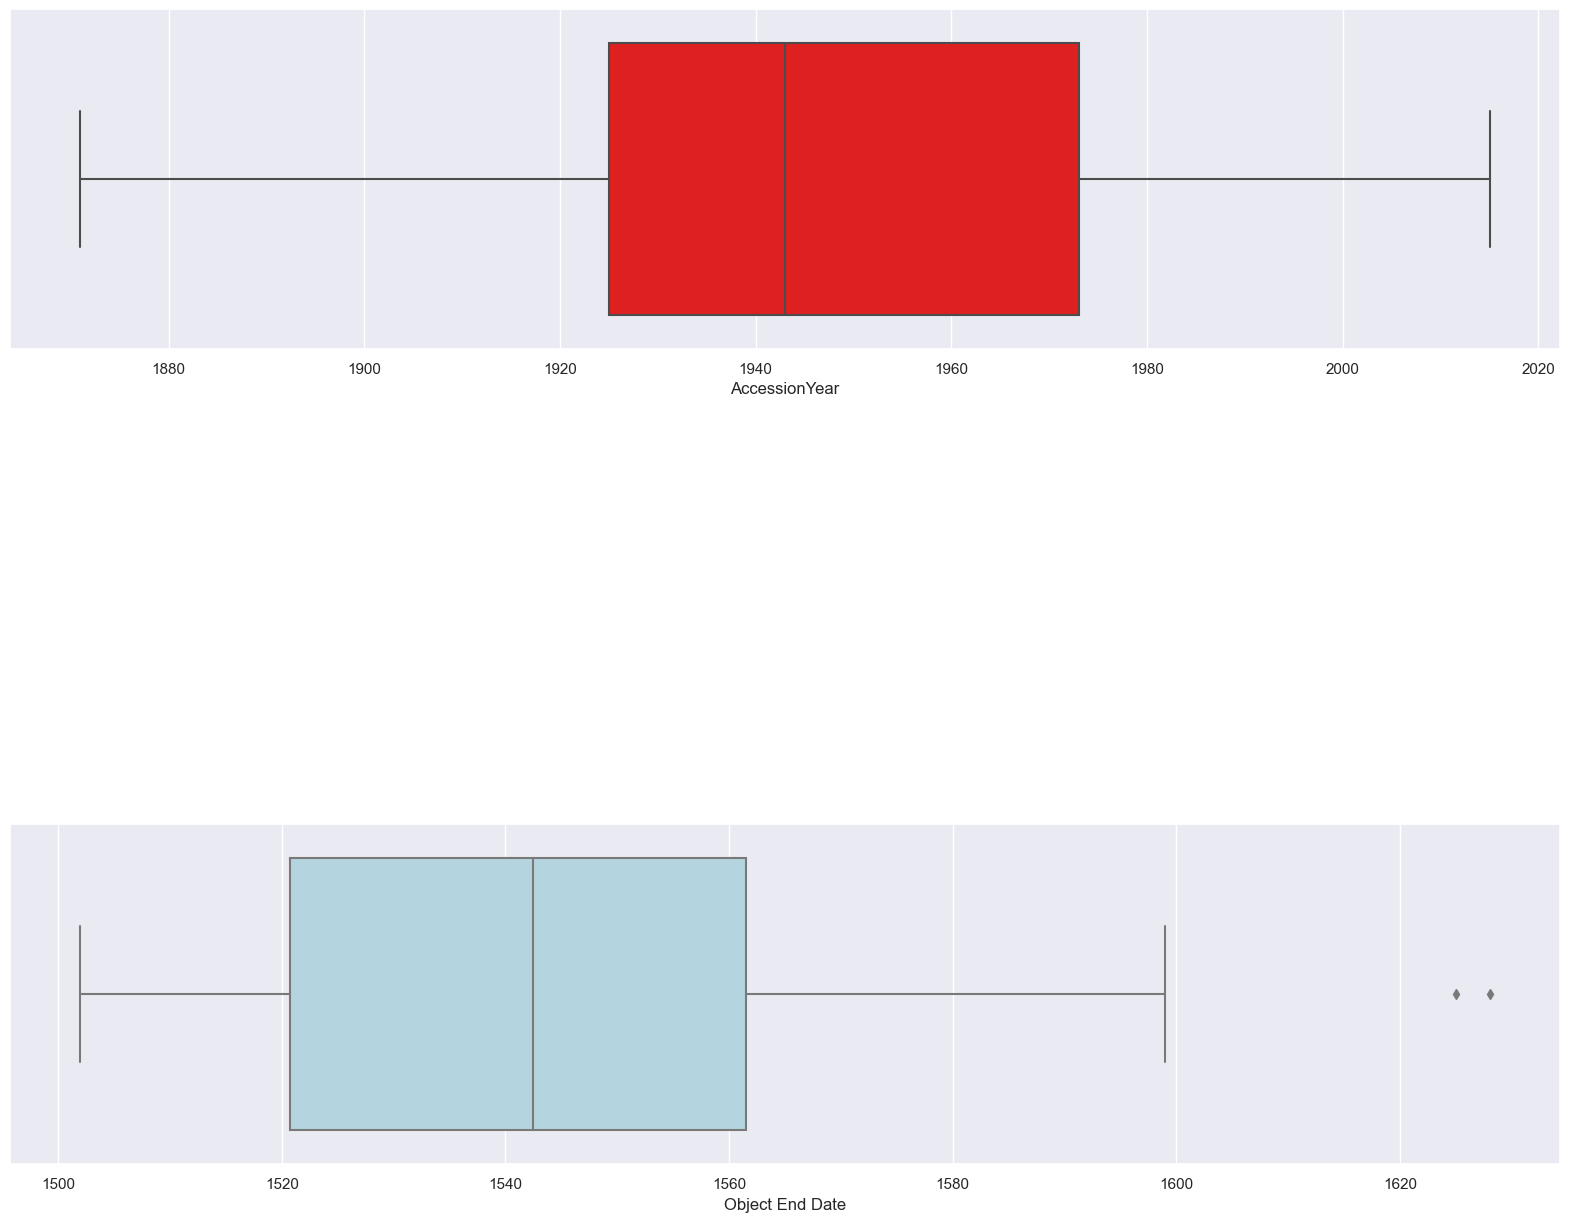

In [19]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= ita_df.AccessionYear, color='red')

#plt.subplot(3,1,2)
#sns.boxplot(x= final_df['Object Begin Date'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= final_df['Object End Date'], color='lightblue')

plt.show()

In [20]:
# a brief summary for the dataset

ita_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,482.0,2.405000e+02,1.392857e+02,0.0,120.25,240.5,360.75,4.810000e+02
Is Highlight,482.0,5.186722e-02,2.219893e-01,0.0,0.00,0.0,0.00,1.000000e+00
Is Timeline Work,482.0,3.360996e-01,4.728642e-01,0.0,0.00,0.0,1.00,1.000000e+00
Is Public Domain,482.0,9.792531e-01,1.426839e-01,0.0,1.00,1.0,1.00,1.000000e+00
Object ID,482.0,4.393390e+05,2.213008e+04,435573.0,436444.25,436978.5,437733.25,6.657020e+05
Gallery Number,197.0,6.258020e+02,9.826337e+01,304.0,602.00,617.0,624.00,9.620000e+02
AccessionYear,482.0,1.948382e+03,3.299152e+01,1871.0,1925.00,1943.0,1973.00,2.015000e+03
Culture,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Period,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dynasty,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 4: Creating visual methods to analyze the data.

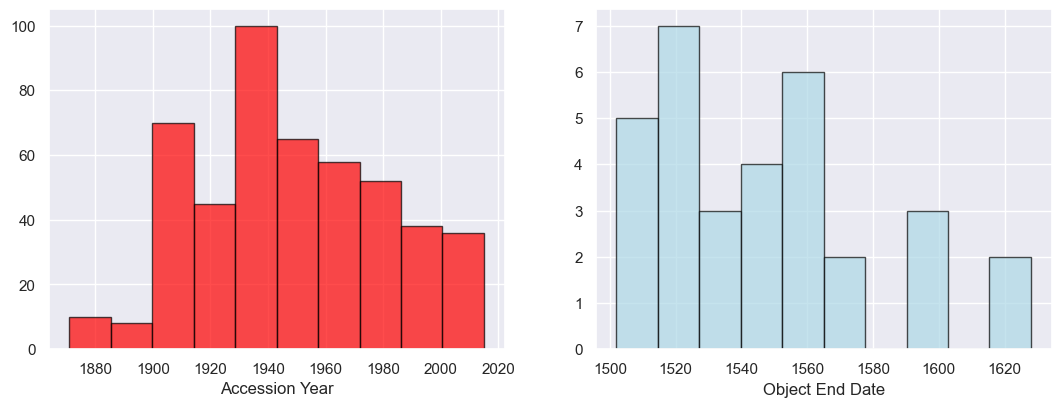

In [21]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(ita_df.AccessionYear, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Accession Year')

plt.subplot(3,3,2)
plt.hist(final_df['Object End Date'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Object End Date')

#plt.subplot(3,3,3)
#plt.hist(insurance_df.charges, color='yellow', edgecolor = 'black', alpha = 0.7)
#plt.xlabel('charges')

plt.show()

In [22]:
# showing the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(ita_df.AccessionYear),stats.skew(final_df['Object End Date'])]},
                        index=['AccessionYear','Object End Date'])  # Measure the skeweness of the required columns
Skewness

,Skewness
AccessionYear,0.150179
Object End Date,0.814146


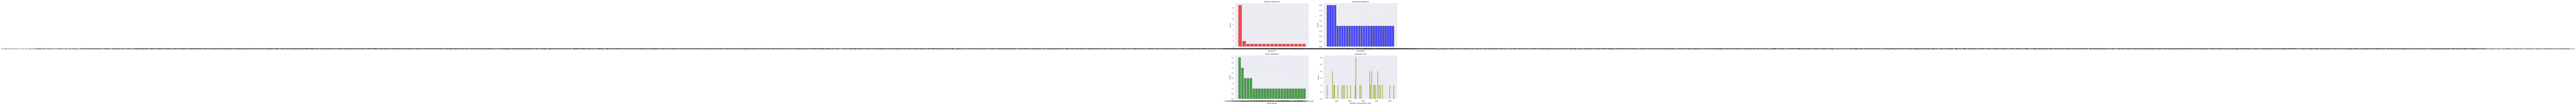

In [45]:
# visualizing data to make analysis

plt.figure(figsize=(20,25))


x = final_df.receivers.value_counts().index    #Values for x-axis
y = [final_df['receivers'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'red',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('receivers?')
plt.ylabel('Count ')
plt.title('receivers distribution')

x1 = final_df.surrenders.value_counts().index    #Values for x-axis
y1 = [final_df['surrenders'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('surrenders')
plt.ylabel('Count')
plt.title('surrenders distribution')

x2 = final_df['Artist Display Name'].value_counts().index    #Values for x-axis
y2 = [final_df['Artist Display Name'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Artist Names')
plt.ylabel('Count ')
plt.title("Artists' distribution")

x3 = final_df.AccessionYear.value_counts().index    #Values for x-axis
y3 = [final_df['AccessionYear'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'yellow',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Number of Accessions Year')
plt.ylabel('Count ')
plt.title("Accession Year")

plt.show()

In [41]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

#final_df_encoded = copy.deepcopy(final_df)
#final_df_encoded.loc[:,['receivers', 'surrenders', 'Artist Display Name']] = final_df_encoded.loc[:,['receivers', 'surrenders', 'Artist Display Name']].apply(LabelEncoder().fit_transform) 

#sns.pairplot(final_df_encoded)  #pairplot
#plt.show()

##### Label encoding the variables before doing a pairplot because pairplot ignores strings


In [42]:
subset_final = final_df[['receivers', 'surrenders', 'Artist Display Name', 'Object End Date' ,'AccessionYear', 'Credit Line']]

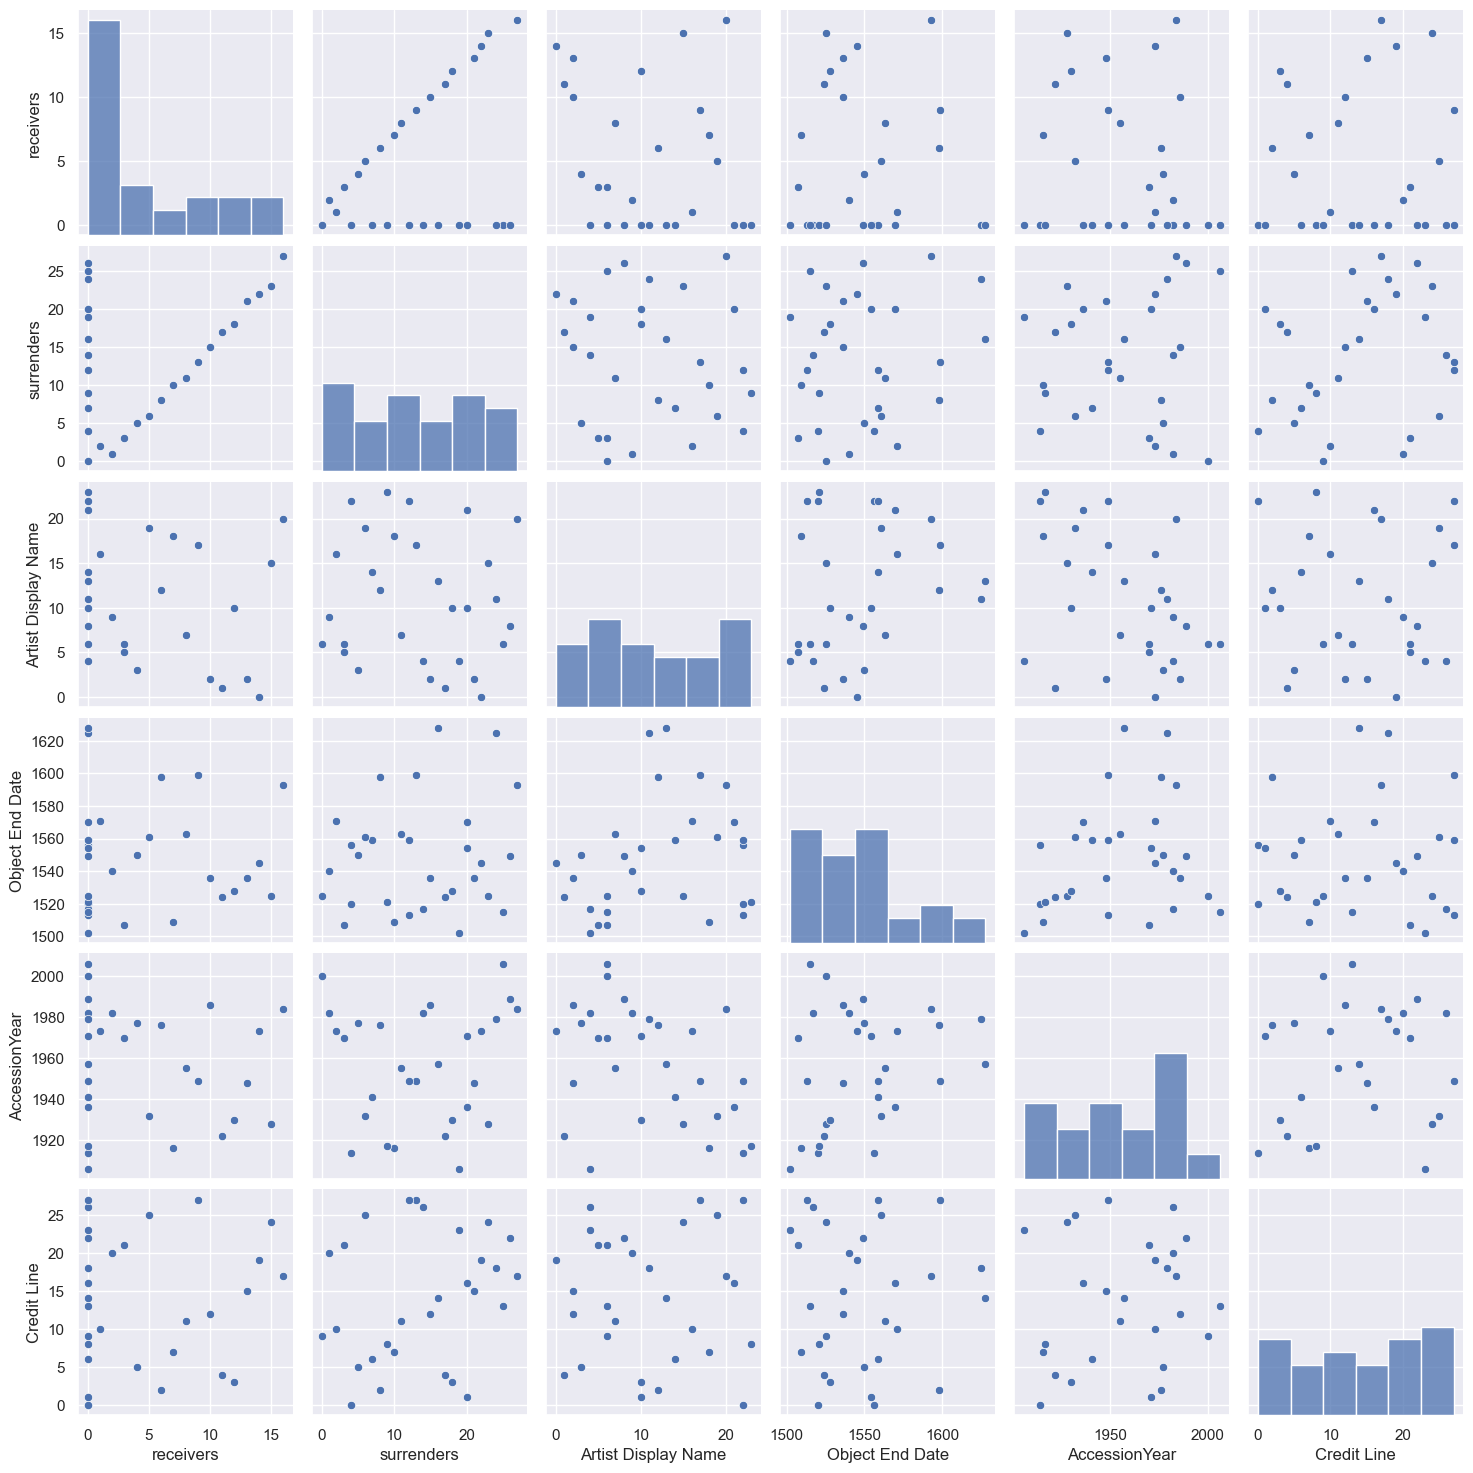

In [43]:
sub_df_encoded = copy.deepcopy(subset_final)
sub_df_encoded.loc[:,['receivers', 'surrenders', 'Artist Display Name', 'Credit Line']] = sub_df_encoded.loc[:,['receivers', 'surrenders', 'Artist Display Name', 'Credit Line']].apply(LabelEncoder().fit_transform) 

sns.pairplot(sub_df_encoded)  #pairplot
plt.show()

# Task 5: 

In [14]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

e:\DHDK\datascience-in-dataspell\datascience-in-dataspell\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


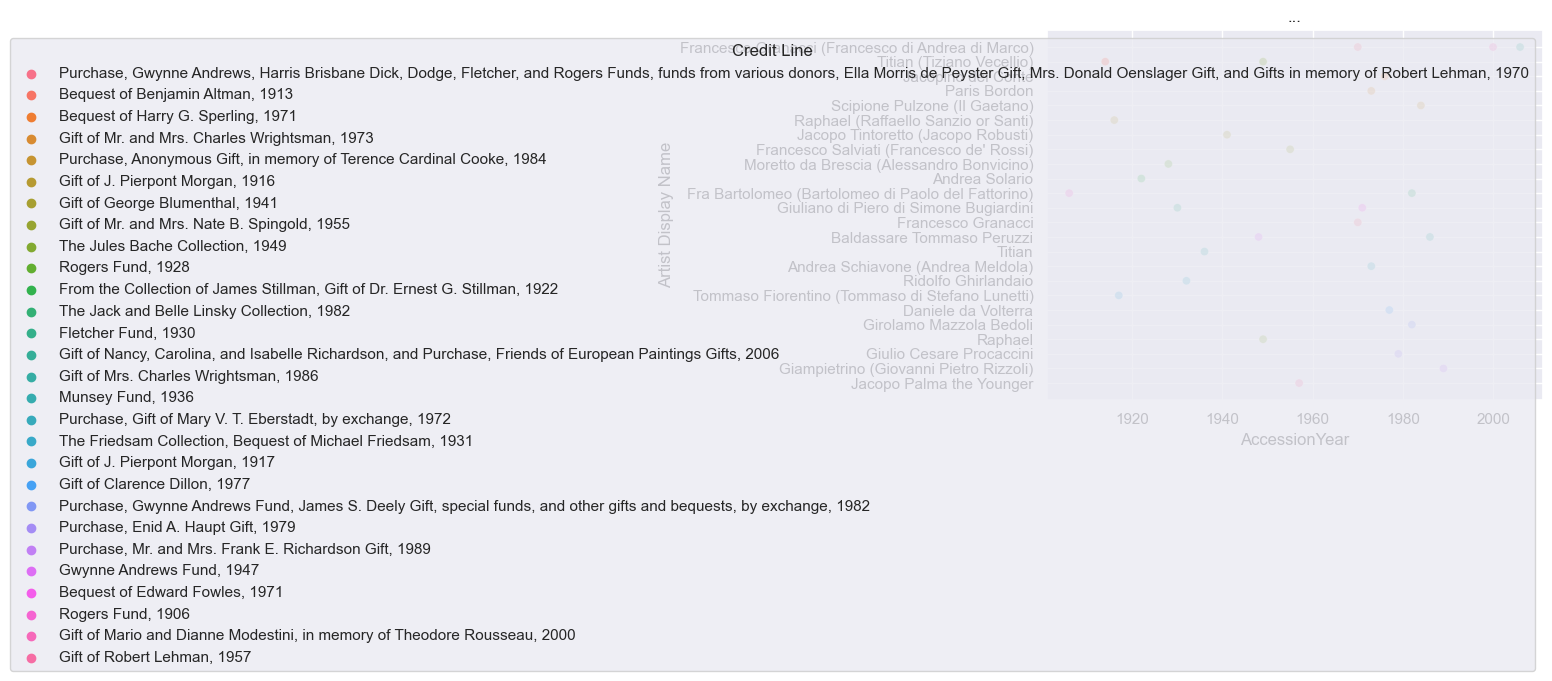

In [53]:
# Scatter plot to look for visual evidence of dependency between attributes Credit Lines and Artists accross different Accession Years
plt.figure()
sns.scatterplot(final_df['AccessionYear'], final_df['Artist Display Name'],hue=final_df['Credit Line'] ,alpha=0.6)
plt.title("...")
plt.show()